In [57]:
from data_chuli import data_yuchuli
X = data_yuchuli('green_tripdata_2020-01.csv', 1, 31)

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2903: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [58]:
import seaborn as sns


In [59]:
X.dropna()

,time,total_amount,trip_distance,fare_amount,extra,temp
0,2020/1/1 0:39,28.83,5.57,25.78,2.75,31.5
1,2020/1/1 0:39,27.12,5.57,26.82,0,31.5
2,2020/1/1 0:45,27.91,7,24.86,2.75,31.5
3,2020/1/1 0:45,17.8,7,17.5,0,31.5
4,2020/1/1 0:32,52.4,20.27,49.35,2.75,31.5
...,...,...,...,...,...,...
80174,2020/1/31 23:29,26.26,4.58,23.21,2.75,32
80175,2020/1/31 23:57,30.32,6.55,27.27,2.75,32
80176,2020/1/31 23:57,29,3.34,25.95,2.75,32
80177,2020/1/31 23:27,33.44,8.92,30.39,2.75,32


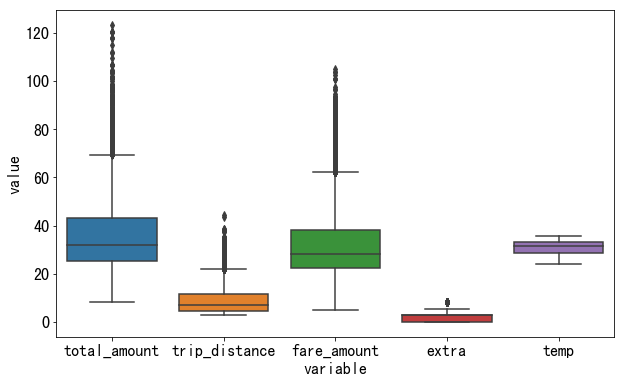

In [67]:
# df = pd.DataFrame(data, columns=['a','b','c','d','e','f'])
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
ax1 = sns.boxplot(x="variable", y="value", data=pd.melt(X.iloc[:, 1:].astype(np.float)))
# sns.boxplot(X.iloc[:,1:2].astype(np.float))
ax1.xaxis.label.set_size(16)
plt.xticks(size=16)

ax1.yaxis.label.set_size(16)
plt.yticks(size=16)
plt.savefig('xiangxing.png')
plt.show()

In [39]:
Q1 = X.quantile(0.3)
Q3 = X.quantile(0.7)
IQR = Q3 - Q1
X = X[~((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]

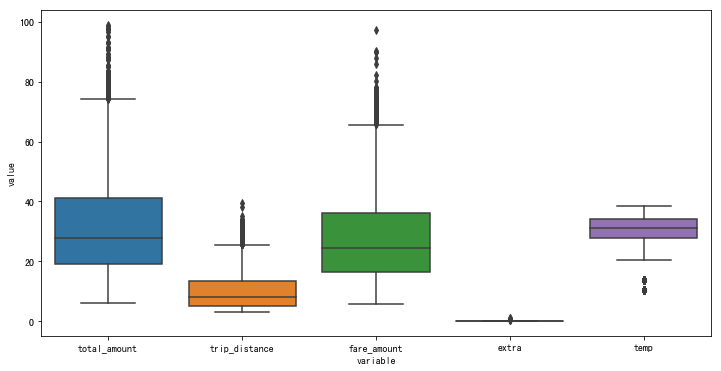

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(X.iloc[:, 1:].astype(np.float)))
plt.show()

In [50]:
df = X.iloc[:,1:]
cutoff = 0.7
for col in df.columns: 
    # Identify index locations above cutoff
    outliers = df[col][ df[col]>cutoff ]

    # Browse through outliers and average according to index location
    for idx in outliers.index:
        # Get index location 
        loc = df.index.get_loc(idx)

        # If not one of last two values in dataframe
        if loc<df.shape[0]-2:
            df[col][loc] = np.mean( df[col][loc+1:loc+3] )
        else: 
            df[col][loc] = np.mean( df[col][loc-3:loc-1] )

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


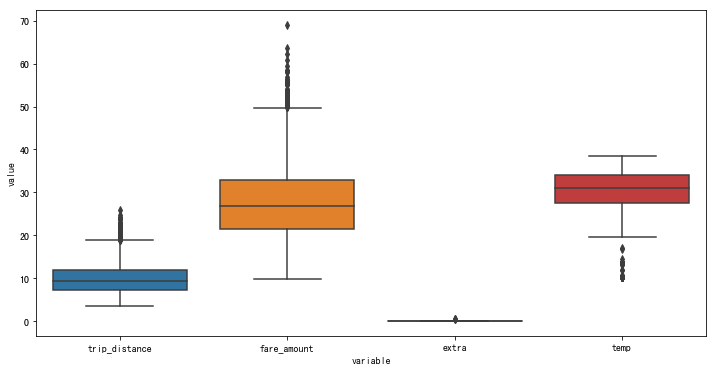

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(x="variable", y="value", data=pd.melt(df.iloc[:, 1:].astype(np.float)))
plt.show()